In [120]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv('oil_spill.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [122]:
df.shape

(937, 50)

### Compute Null Values

In [123]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
r2=df['target'].value_counts()
print(r2)

0    896
1     41
Name: target, dtype: int64


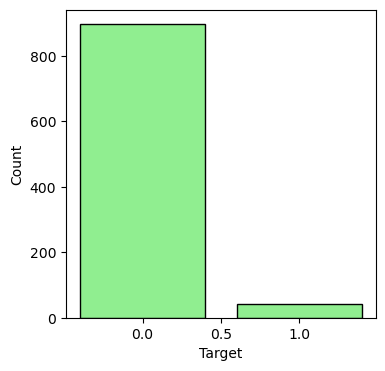

In [126]:
plt.figure(figsize=(4,4))
plt.bar(r2.index,r2,color='lightgreen',edgecolor='black')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## ***Mechine Learning***

###  Design Independent and dependent Data

In [127]:
x=df.iloc[:,:-1]
y=df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 49)
(937,)


### Training and Testing data

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 49)
(235, 49)
(702,)
(235,)


### Creating the mean_absolute_error ,mean_squared_error,r2_score

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
def reg_eval_matrics(y,ypred):
    mae=mean_absolute_error(y,ypred)
    mse=mean_squared_error(y,ypred)
    rmse=np.sqrt(mse)
    r2=r2_score(y,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('Rmse',rmse)
    print('R2 score',r2)
       
def mscore(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    
    
def reg_cof_inter(model):
    print('Model cofficint',model.cof_)
    print('Model intercept',model.intercept_)

### Creating the function of confusion_Matrix, Classification_Report ,Accuracy_score,Traning and Testing Report

In [132]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [133]:
def eval_mat(ytest,ypred):
    print('confusion_matrix\n',confusion_matrix(ytest,ypred))
    print('classification_report\n',classification_report(ytest,ypred))
    print('accuracy_report\n',accuracy_score(ytest,ypred))
    
    
def mscore1(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    

### Apply Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
regressior1=LinearRegression()
regressior1.fit(x_train,y_train)

LinearRegression()

In [136]:
mscore(regressior1)

Training Score 0.43112140607757765
Testing Score 0.16960987577525954


In [137]:
ypred_1=regressior1.predict(x_test)
reg_eval_matrics(y_test,ypred_1)

MAE 0.09241874153615164
MSE 0.03383210103224385
Rmse 0.1839350456879924
R2 score 0.16960987577525954


### Apply Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log= LogisticRegression(max_iter=1000,solver='liblinear')
log.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [164]:
mscore1(log)

Training Score 0.9686609686609686
Testing Score 0.9659574468085106


In [54]:
ypred_3=log.predict(x_test)

In [55]:
eval_mat(y_test,ypred_3)

confusion_matrix
 [[224   1]
 [  7   3]]
classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       225
           1       0.75      0.30      0.43        10

    accuracy                           0.97       235
   macro avg       0.86      0.65      0.71       235
weighted avg       0.96      0.97      0.96       235

accuracy_report
 0.9659574468085106


### Apply KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn= KNeighborsClassifier(n_neighbors=15)

In [111]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [112]:
mscore1(knn)

Training Score 0.9558404558404558
Testing Score 0.9574468085106383


In [113]:
ypred_knn=knn.predict(x_test)

In [114]:
eval_mat(y_test,ypred_knn)

confusion_matrix
 [[225   0]
 [ 10   0]]
classification_report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       225
           1       0.00      0.00      0.00        10

    accuracy                           0.96       235
   macro avg       0.48      0.50      0.49       235
weighted avg       0.92      0.96      0.94       235

accuracy_report
 0.9574468085106383


### Apply Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
tree= DecisionTreeClassifier(criterion='gini')
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [140]:
mscore1(tree)

Training Score 1.0
Testing Score 0.9531914893617022


In [141]:
ypred_4=tree.predict(x_test)

In [142]:
eval_mat(y_test,ypred_4)

confusion_matrix
 [[219   6]
 [  5   5]]
classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       225
           1       0.45      0.50      0.48        10

    accuracy                           0.95       235
   macro avg       0.72      0.74      0.73       235
weighted avg       0.96      0.95      0.95       235

accuracy_report
 0.9531914893617022


In [143]:
from sklearn.tree import plot_tree

In [144]:
cn=['0','1','2']
fn=x_train.columns
print(cn)
print(fn)

['0', '1', '2']
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49'],
      dtype='object')


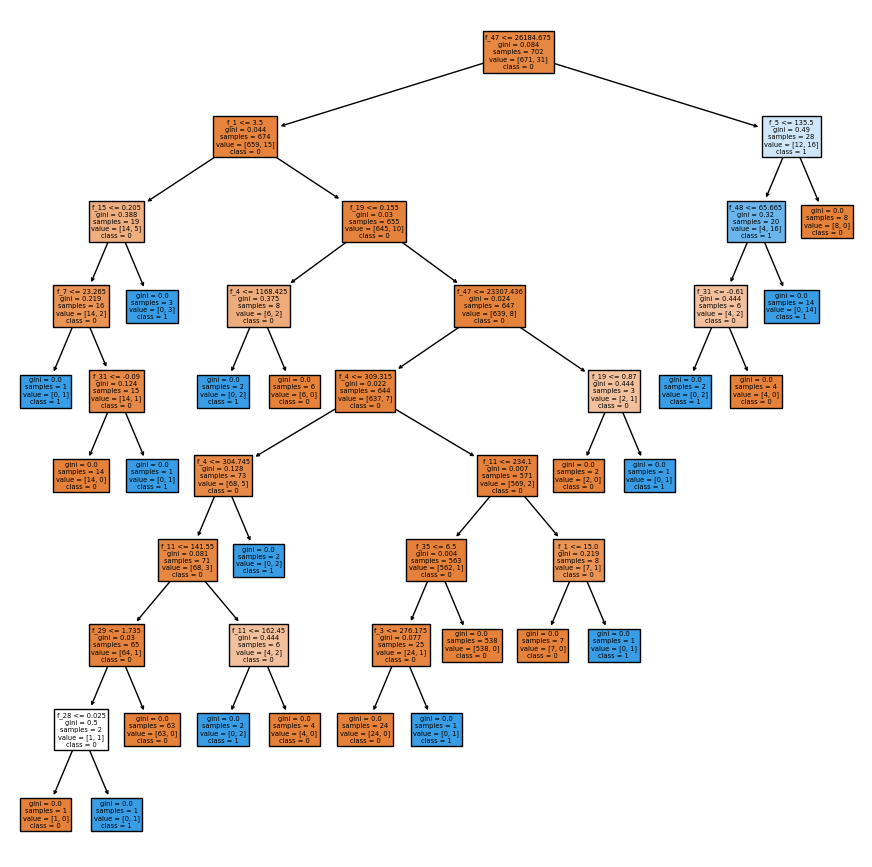

In [145]:
plt.figure(figsize=(11,11))
plot_tree(tree,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Apply Random Forest classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rd= RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=6,min_samples_split=6)
rd.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=80)

In [148]:
mscore1(rd)

Training Score 0.9843304843304843
Testing Score 0.9617021276595744


In [149]:
ypred_5=rd.predict(x_test)

In [150]:
eval_mat(y_test,ypred_5)

confusion_matrix
 [[224   1]
 [  8   2]]
classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       225
           1       0.67      0.20      0.31        10

    accuracy                           0.96       235
   macro avg       0.82      0.60      0.64       235
weighted avg       0.95      0.96      0.95       235

accuracy_report
 0.9617021276595744


In [151]:
from sklearn.tree import plot_tree

In [152]:
cn = ['5','6','7','4','8','3']
fn = x_train.columns
print(cn)
print(fn)

['5', '6', '7', '4', '8', '3']
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49'],
      dtype='object')


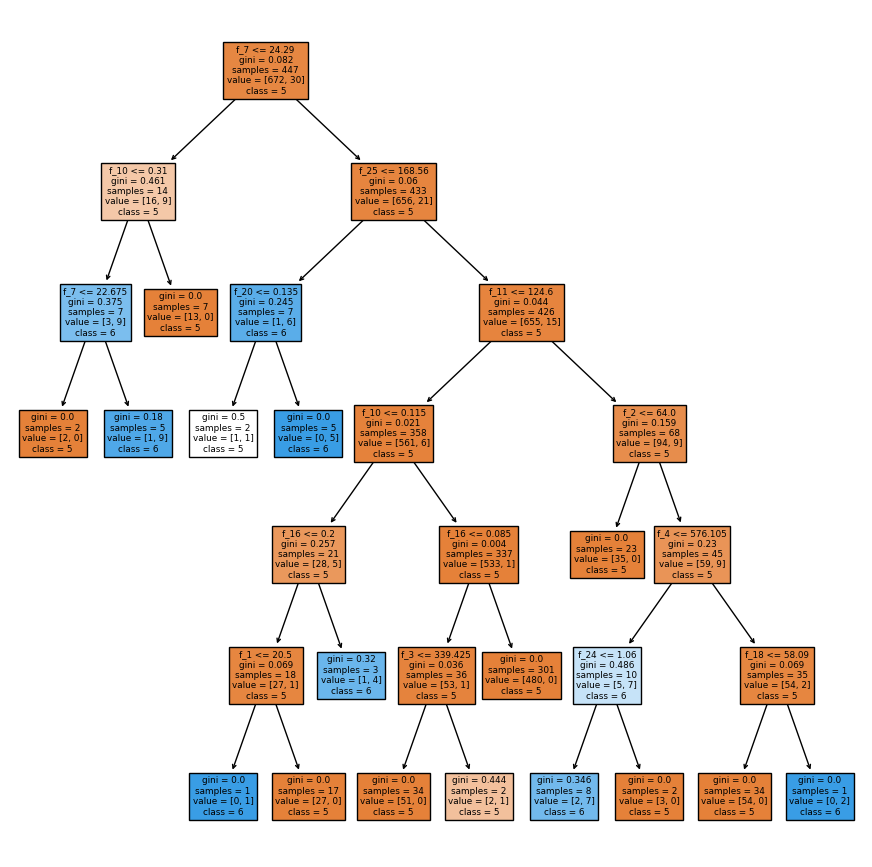

In [153]:
plt.figure(figsize=(11,11))
plot_tree(rd.estimators_[0],feature_names=fn,class_names=cn,filled=True)
plt.show()

### Apply Boosting and Bagging Classifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [155]:
a1=DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=8)

adaboost= AdaBoostClassifier(n_estimators=80,base_estimator=a1)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         min_samples_split=8),
                   n_estimators=80)

In [156]:
mscore1(adaboost)

Training Score 1.0
Testing Score 0.9702127659574468


In [157]:
ypred_6=adaboost.predict(x_test)

In [158]:
eval_mat(y_test,ypred_6)

confusion_matrix
 [[224   1]
 [  6   4]]
classification_report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       225
           1       0.80      0.40      0.53        10

    accuracy                           0.97       235
   macro avg       0.89      0.70      0.76       235
weighted avg       0.97      0.97      0.97       235

accuracy_report
 0.9702127659574468


In [159]:
baggin = BaggingClassifier(base_estimator=tree,n_estimators=15,max_samples=x_train.shape[0],max_features=x_train.shape[1],random_state=2022)
baggin.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=49,
                  max_samples=702, n_estimators=15, random_state=2022)

In [160]:
mscore1(baggin)

Training Score 0.9928774928774928
Testing Score 0.9659574468085106


In [161]:
ypred_7=baggin.predict(x_test)

In [162]:
eval_mat(y_test,ypred_7)

confusion_matrix
 [[223   2]
 [  6   4]]
classification_report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       225
           1       0.67      0.40      0.50        10

    accuracy                           0.97       235
   macro avg       0.82      0.70      0.74       235
weighted avg       0.96      0.97      0.96       235

accuracy_report
 0.9659574468085106


### Performance of all the model

In [165]:
performance={'LinReg':r2_score(y_test,ypred_1),
            'logReg':accuracy_score(y_test,ypred_3),
            'KNN':accuracy_score(y_test,ypred_knn),
            'DTC':accuracy_score(y_test,ypred_4),
            'RFC':accuracy_score(y_test,ypred_5),
           'Addaboost':accuracy_score(y_test,ypred_6),
            'Bagging':accuracy_score(y_test,ypred_7)}

res=pd.DataFrame(performance,index=['Accuracy'])
res.T

,Accuracy
LinReg,0.169610
logReg,0.965957
KNN,0.957447
DTC,0.953191
RFC,0.961702
Addaboost,0.970213
Bagging,0.965957


### Save the model.

In [166]:
import pickle

In [167]:
pickle.dump(adaboost, open('adaboost.pkl', 'wb')) 

### Load the model

In [168]:
loaded_model = pickle.load(open('adaboost.pkl', 'rb'))

In [169]:
test_acc = loaded_model.score(x_test, y_test)
print(test_acc)

0.9702127659574468
